#Etape 1 - Importations des librairies

##1.1 - Importation des librairies

In [40]:
#Importation de la librairie Pandas
import pandas as pd

#Importation de la librairie Numpy
import numpy as np

#Importation de la librairie plotly express
import plotly.express as px

#Importation de la libairie matplotlib
import matplotlib.pyplot as plt

#Importation de la librairie seaborn
import seaborn as sns

#Importation de la librairie scipy
import scipy as sp

In [41]:
pd.set_option('display.max_columns', None)

##1.2 - Importation du fichier df_merge.csv

In [42]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
print (os.getcwd())

os.chdir(r"/content/gdrive/My Drive/Colab Notebooks/Formation/P11")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/Formation/P11


In [43]:
#Importation du fichier df_merge_2_filtre.csv
df_merge_2_filtre = pd.read_csv("df_merge_2_filtre.csv", sep=',', decimal='.')

In [44]:
#Vérification
df_merge_2_filtre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 15 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Pays                                                           172 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       172 non-null    float64
 5   Disponibilité intérieure                                       172 non-null    float64
 6   Exportations - Quantité                                        172 non-null    float64
 7   Importations - Quantité                                       

In [45]:
#Remplacer float64 par float32
df_merge_2_filtre = df_merge_2_filtre.astype({col: np.float32 for col in df_merge_2_filtre.select_dtypes(include="float64").columns})
df_merge_2_filtre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 15 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Pays                                                           172 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float32
 2   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float32
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float32
 4   Disponibilité de protéines en quantité (g/personne/jour)       172 non-null    float32
 5   Disponibilité intérieure                                       172 non-null    float32
 6   Exportations - Quantité                                        172 non-null    float32
 7   Importations - Quantité                                       

In [46]:
#Visualisation de la table
df_merge_2_filtre.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,pib_2016,pib_2017,évolution_pib_%
0,Afghanistan,5.0,1.530000,0.33,0.54,57.0,0.0,29.0,55.0,28.0,0.0,36296.113281,522.082214,525.469788,0.648855
1,Afrique du Sud,143.0,35.689999,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,0.0,57009.757812,5651.206055,6618.334961,17.113680
2,Albanie,85.0,16.360001,6.45,6.26,47.0,0.0,38.0,47.0,13.0,4.0,2884.168945,4168.375488,4614.047852,10.691756
3,Algérie,22.0,6.380000,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0,41389.187500,4424.985352,4554.667480,2.930682
4,Allemagne,71.0,19.469999,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,-29.0,82658.406250,42961.035156,45526.601562,5.971840


#Etape 2 - ACP

##2.1 - La matrice de corrélation

In [47]:
from scipy.stats import kstest, normaltest, anderson

# Sélection des colonnes numériques
num_df = df_merge_2_filtre.select_dtypes(include=['float32','float64','int'])

# DataFrame pour stocker les résultats
results = []

for col in num_df.columns:
    data = num_df[col].dropna()

    # Tests
    stat_k2, p_k2 = normaltest(data)
    stat_ks, p_ks = kstest(data, 'norm')
    ad_result = anderson(data, dist='norm')

    results.append({
        'Variable': col,
        'D’Agostino p-value': p_k2,
        'Kolmogorov p-value': p_ks,
        'Anderson statistic': ad_result.statistic,
        'Anderson Critical (5%)': ad_result.critical_values[2]
    })

# Tableau final
normality_df = pd.DataFrame(results)
normality_df


,Variable,D’Agostino p-value,Kolmogorov p-value,Anderson statistic,Anderson Critical (5%)
0,Disponibilité alimentaire (Kcal/personne/jour),7.017844e-05,3.624191e-277,4.037783,0.77
1,Disponibilité alimentaire en quantité (kg/pers...,4.705249e-05,4.988631e-177,3.254287,0.77
2,Disponibilité de matière grasse en quantité (g...,3.941468e-06,6.224151e-81,5.377655,0.77
3,Disponibilité de protéines en quantité (g/pers...,8.533290e-06,6.436599e-98,2.945217,0.77
4,Disponibilité intérieure,0.000000e+00,3.624191e-277,38.807341,0.77
5,Exportations - Quantité,0.000000e+00,2.749954e-40,48.280672,0.77
6,Importations - Quantité,6.433543e-32,1.474873e-122,30.218064,0.77
7,Nourriture,0.000000e+00,3.624191e-277,39.500629,0.77
8,Production,0.000000e+00,2.213658e-144,40.906367,0.77
9,Variation de stock,0.000000e+00,5.296083e-18,35.673588,0.77


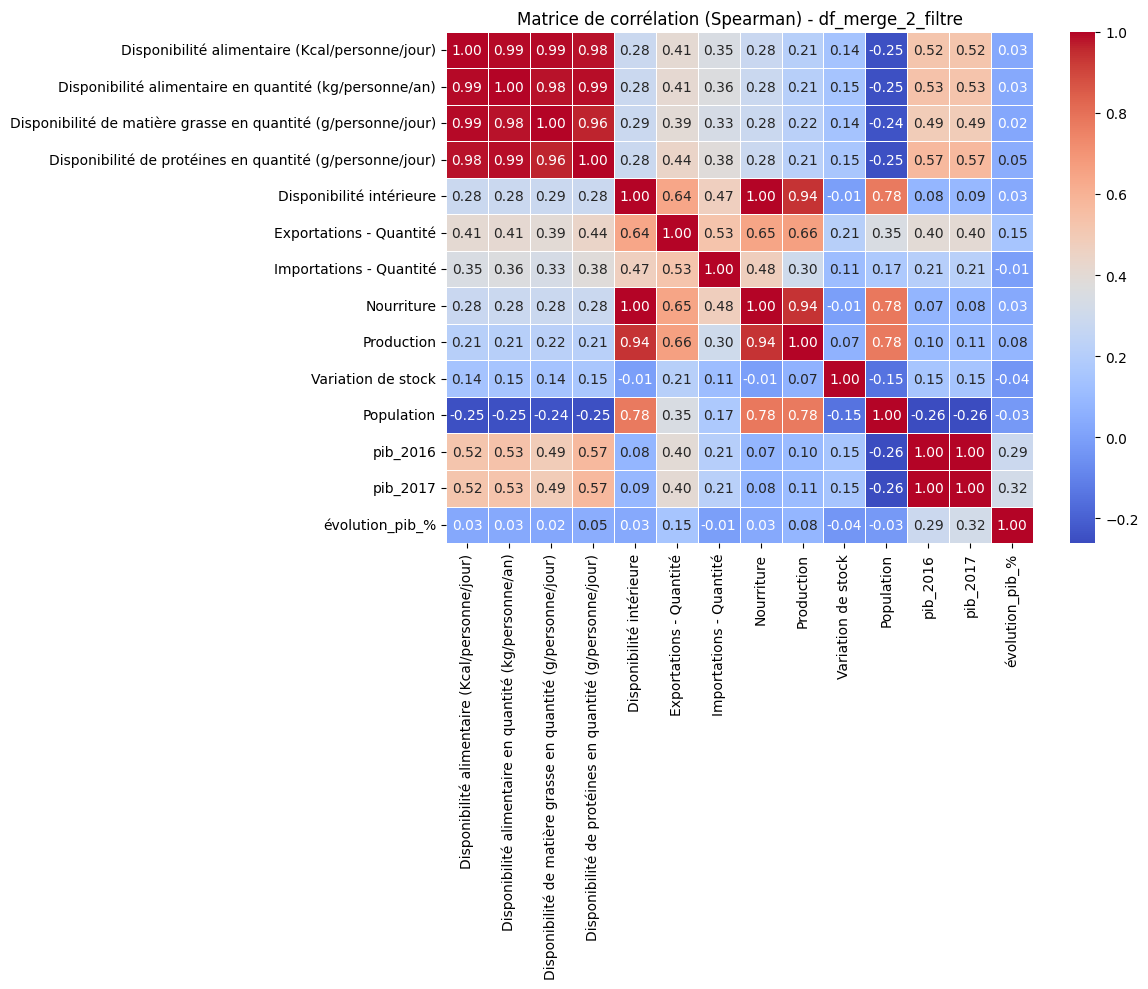

In [48]:
# Sélection des colonnes numériques uniquement
num_df = df_merge_2_filtre.select_dtypes(include=['float32','float64','int'])

# Calcul de la matrice de corrélation Spearman
corr_matrix = num_df.corr(method='spearman')

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation (Spearman) - df_merge_2_filtre")
plt.tight_layout()
plt.show()


##2.2- Les éboulis des valeurs propres

In [49]:
#Importation de StandardScaler
from sklearn.preprocessing import StandardScaler

In [50]:
# Sélection des colonnes numériques
X = df_merge_2_filtre.select_dtypes(include=['float32', 'float64', 'int'])

In [51]:
# Normalisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

In [52]:
df_scaled = pd.DataFrame(df_scaled, columns=X.columns, index=df_merge_2_filtre.index)

In [53]:
#Importation de PCA
from sklearn.decomposition import PCA

In [54]:
# ACP
pca = PCA()
pca.fit(df_scaled)

PCA()

In [55]:
#Pourcentage d'inertie
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_variance = explained_variance_ratio.cumsum()

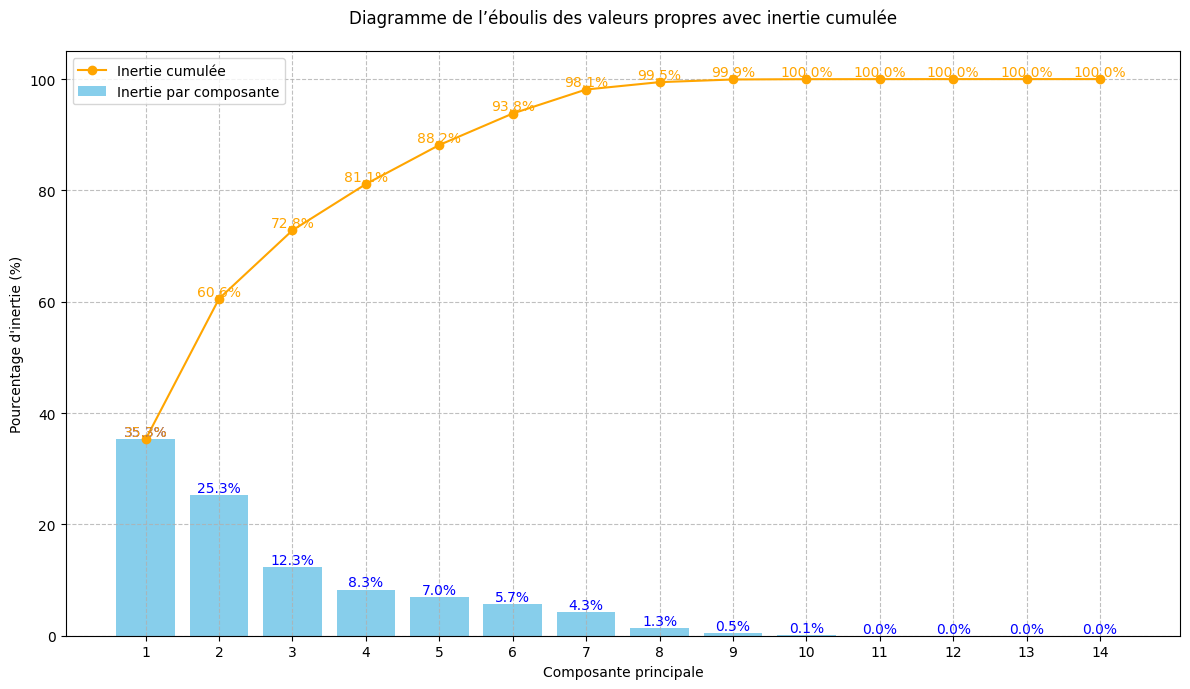

In [56]:
#Diagramme de l'éboulis avec valeurs affichées
plt.figure(figsize=(12, 7))
components = range(1, len(explained_variance_ratio) + 1)

#Barres pour l'inertie individuelle
plt.bar(components, explained_variance_ratio, color='skyblue', label="Inertie par composante")

#Ajout des valeurs au-dessus de chaque barre
for i, val in enumerate(explained_variance_ratio):
    plt.text(i+1, val + 0.005, f"{val:.1f}%",
             ha='center', va='bottom', fontsize=10, color='blue')

#Courbe pour l'inertie cumulée
plt.plot(components, cumulative_variance, color='orange', marker='o', label="Inertie cumulée")

#Ajout des valeurs sur la courbe
for i, val in enumerate(cumulative_variance):
    plt.text(i+1, val + 0.005, f"{val:.1f}%",
             ha='center', va='bottom', fontsize=10, color='orange')

#Détails du graphique
plt.title("Diagramme de l’éboulis des valeurs propres avec inertie cumulée", pad=20)
plt.xlabel("Composante principale")
plt.ylabel("Pourcentage d'inertie (%)")
plt.xticks(components)
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend()
plt.tight_layout()
plt.show()


In [57]:
#Je choisis un seuil de 80% donc le nombre de composantes principales se limitera à 4.

##2.3 - Le cercle des corrélations

In [58]:
# Liste des colonnes numériques choisies
colonnes_numeriques = [
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Disponibilité intérieure',
    'Exportations - Quantité',
    'Importations - Quantité',
    'Nourriture',
    'Production',
    'Variation de stock',
    'Population',
    'pib_2017',
    'évolution_pib_%'
]

# Sélection des colonnes
X = df_merge_2_filtre[colonnes_numeriques]

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
#ACP
pca = PCA(n_components=4)
pca.fit(X_scaled)

#Fonction pour tracer un cercle des corrélations
def cercle_correlation(pca, axis1, axis2, labels):
    pcs = pca.components_
    explained_var = pca.explained_variance_ratio_

    plt.figure(figsize=(8,8))
    circle = plt.Circle((0,0), 1, color='gray', fill=False)
    plt.gca().add_artist(circle)

    for i, col in enumerate(labels):
        plt.arrow(0, 0, pcs[axis1, i], pcs[axis2, i],
                  head_width=0.03, head_length=0.03, fc='red', ec='red')
        plt.text(pcs[axis1, i]*1.1, pcs[axis2, i]*1.1, col, fontsize=9)

    plt.xlabel(f"PC{axis1+1} ({explained_var[axis1]*100:.1f}% de variance)")
    plt.ylabel(f"PC{axis2+1} ({explained_var[axis2]*100:.1f}% de variance)")
    plt.title(f"Cercle des corrélations (PC{axis1+1}–PC{axis2+1})")
    plt.axhline(0, color='grey', linestyle='--')
    plt.axvline(0, color='grey', linestyle='--')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

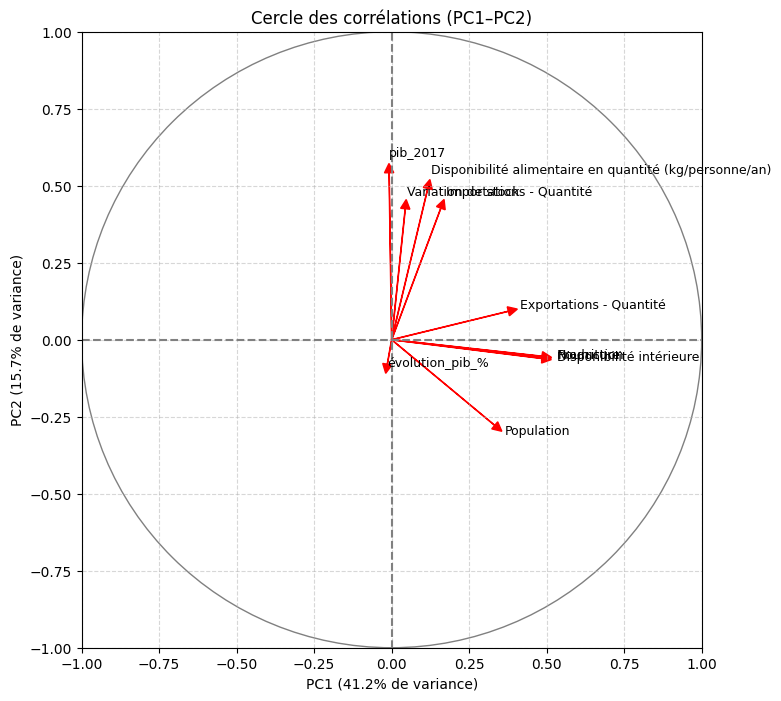

In [60]:
#PC1 et PC2
cercle_correlation(pca, 0, 1, X.columns)

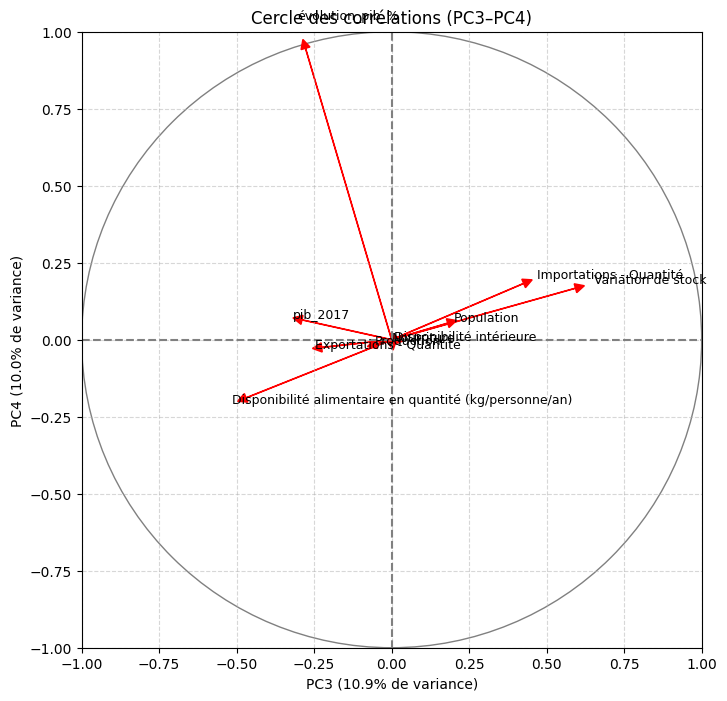

In [61]:
#PC3 et PC4
cercle_correlation(pca, 2, 3, X.columns)

##2.4 - La représentation des individus

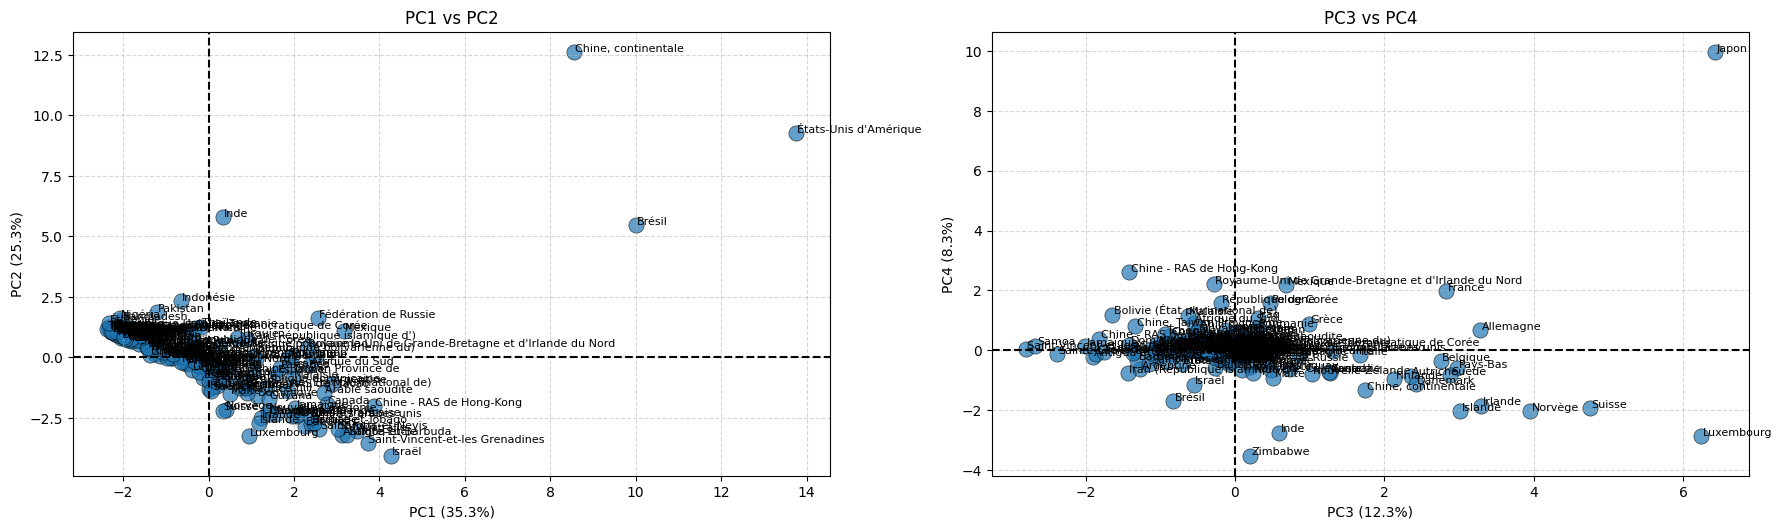

In [62]:
#Construction du Dataframe aligné
df_acp = df_merge_2_filtre.copy().reset_index(drop=True)

variables = [
    col for col in df_acp.columns
    if col not in ["Pays", "Cluster_3", "Cluster_4", "Cluster"]
]

X = df_acp[variables]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

df_pca = df_acp[["Pays"]].copy()
for i in range(10):
    df_pca[f"PC{i+1}"] = X_pca[:, i]

#Création des scatter plots
pairs = [(i, i+1) for i in range(0, 4, 2)]
n_pairs = len(pairs)

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

for idx, (axis1, axis2) in enumerate(pairs):
    ax = axes[idx]

    #Scatter plot principal
    ax.scatter(
        df_pca[f"PC{axis1+1}"],
        df_pca[f"PC{axis2+1}"],
        alpha=0.7, s=120, edgecolors="black", linewidth=0.5
    )

    #Labels
    for i, row in df_pca.iterrows():
        ax.text(
            row[f"PC{axis1+1}"] + 0.02,
            row[f"PC{axis2+1}"] + 0.02,
            row["Pays"],
            fontsize=8
        )

    #Axes et titres
    ax.set_xlabel(f"PC{axis1+1} ({pca.explained_variance_ratio_[axis1]*100:.1f}%)")
    ax.set_ylabel(f"PC{axis2+1} ({pca.explained_variance_ratio_[axis2]*100:.1f}%)")
    ax.set_title(f"PC{axis1+1} vs PC{axis2+1}")
    ax.grid(True, linestyle='--', alpha=0.5)

    #Lignes x=0 et y=0
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
    ax.axhline(y=0, color='black', linestyle='--', linewidth=1.5)

#Suppression des cases en trop
for j in range(n_pairs, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Etape 3 - Dendrogramme

In [63]:
df_merge_2_filtre.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,pib_2016,pib_2017,évolution_pib_%
0,Afghanistan,5.0,1.530000,0.33,0.54,57.0,0.0,29.0,55.0,28.0,0.0,36296.113281,522.082214,525.469788,0.648855
1,Afrique du Sud,143.0,35.689999,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0,0.0,57009.757812,5651.206055,6618.334961,17.113680
2,Albanie,85.0,16.360001,6.45,6.26,47.0,0.0,38.0,47.0,13.0,4.0,2884.168945,4168.375488,4614.047852,10.691756
3,Algérie,22.0,6.380000,1.50,1.97,277.0,0.0,2.0,264.0,275.0,0.0,41389.187500,4424.985352,4554.667480,2.930682
4,Allemagne,71.0,19.469999,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0,-29.0,82658.406250,42961.035156,45526.601562,5.971840


In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

#Sélection des colonnes numériques pertinentes
colonnes_numeriques = [
    'Disponibilité alimentaire en quantité (kg/personne/an)',
    'Disponibilité intérieure',
    'Exportations - Quantité',
    'Importations - Quantité',
    'Nourriture',
    'Production',
    'Variation de stock',
    'Population',
    'pib_2017',
    'évolution_pib_%'
]

In [65]:
#Nettoyage des données
df_clean = df_merge_2_filtre.dropna(subset=colonnes_numeriques + ['Pays'])
df_features = df_clean[colonnes_numeriques]

In [66]:
#Normalisation
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

In [67]:
df_clean.shape

(172, 15)

In [68]:
#Vérification du nombre de valeurs manquantes
df_merge_2_filtre[colonnes_numeriques].isna().sum()

,0
Disponibilité alimentaire en quantité (kg/personne/an),0
Disponibilité intérieure,0
Exportations - Quantité,0
Importations - Quantité,0
Nourriture,0
Production,0
Variation de stock,0
Population,0
pib_2017,0
évolution_pib_%,0


In [69]:
#Filtrer les lignes
seuil = 0.3  # au moins 30 % de données non nulles
colonnes_utilisables = df_merge_2_filtre[colonnes_numeriques].loc[:, df_merge_2_filtre[colonnes_numeriques].notna().mean() > seuil].columns
df_clean = df_merge_2_filtre[colonnes_utilisables].dropna()

In [70]:
#Nettoyage du dataframe
df_clean = df_merge_2_filtre[colonnes_utilisables].dropna()

In [71]:
df_clean.shape

(172, 10)

In [72]:
df_clean.dtypes

,0
Disponibilité alimentaire en quantité (kg/personne/an),float32
Disponibilité intérieure,float32
Exportations - Quantité,float32
Importations - Quantité,float32
Nourriture,float32
Production,float32
Variation de stock,float32
Population,float32
pib_2017,float32
évolution_pib_%,float32


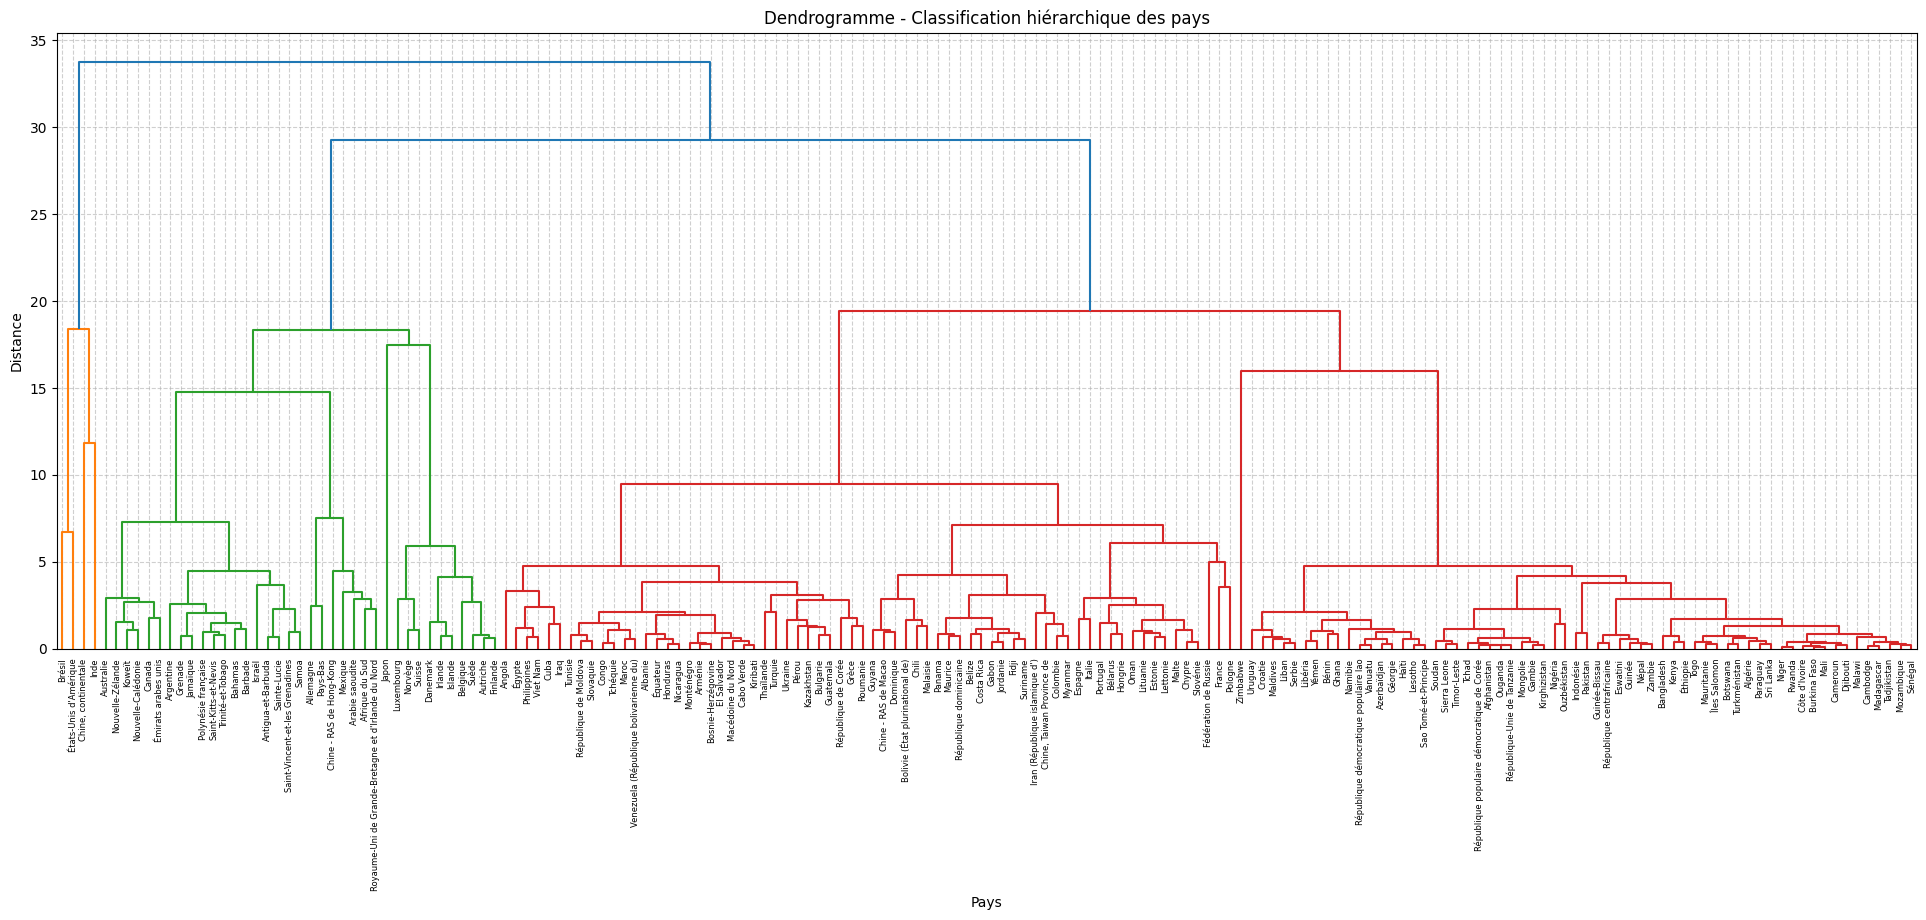

In [73]:
#Sélection des colonnes numériques (on exclut 'Pays')
X = df_merge_2_filtre.drop(columns=['Pays']).select_dtypes(include=['float32','float64','int'])

#Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Calcul de la matrice de liaison (méthode 'ward' = variance minimale)
Z = linkage(X_scaled, method='ward')

#Dendrogramme
plt.figure(figsize=(24, 8))
dendrogram(Z, labels=df_merge_2_filtre['Pays'].values, leaf_rotation=90, leaf_font_size=6)
plt.title("Dendrogramme - Classification hiérarchique des pays")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Etape 4 - Méthode du coude et score silhouette

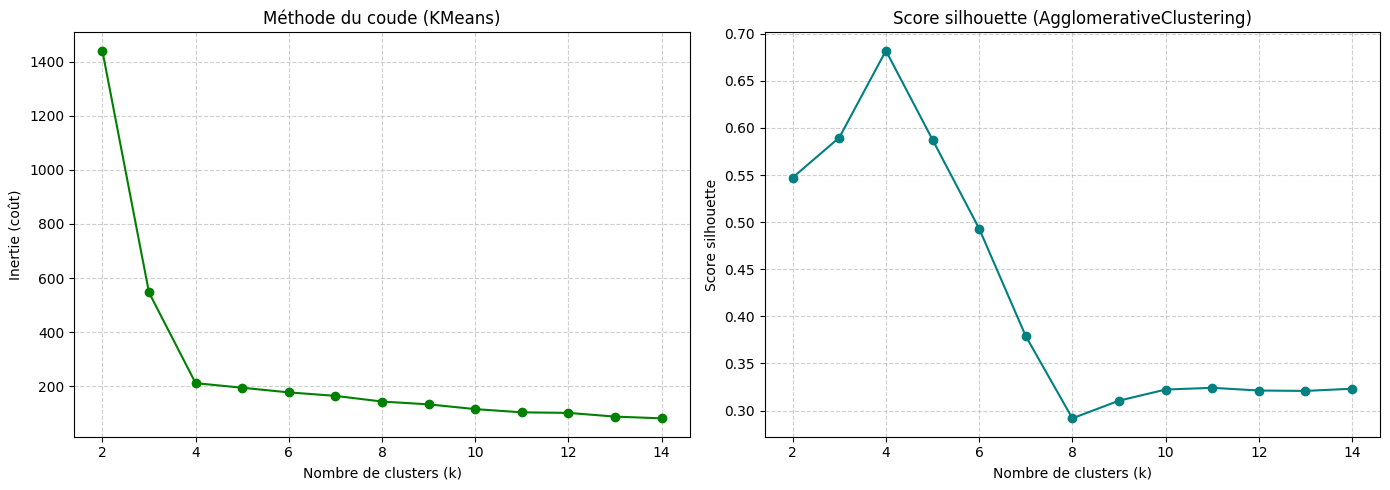

In [74]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


#Générer des données factices
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

#Paramètres
k_values = range(2, 15)
inertias = []
silhouette_scores = []

#Boucle sur les valeurs de k
for k in k_values:
    #KMeans pour l'inertie
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

    #AgglomerativeClustering pour le score silhouette
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

#Tracer les deux courbes côte à côte
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

#Méthode du coude
axs[0].plot(k_values, inertias, marker='o', color='green')
axs[0].set_title("Méthode du coude (KMeans)")
axs[0].set_xlabel("Nombre de clusters (k)")
axs[0].set_ylabel("Inertie (coût)")
axs[0].grid(True, linestyle='--', alpha=0.6)

#Score silhouette
axs[1].plot(k_values, silhouette_scores, marker='o', color='teal')
axs[1].set_title("Score silhouette (AgglomerativeClustering)")
axs[1].set_xlabel("Nombre de clusters (k)")
axs[1].set_ylabel("Score silhouette")
axs[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


#Etape 5 - Clustering

##5.1 - Test avec k-means = 3

In [75]:
# On récupère seulement 'Pays' depuis df_merge_2_filtre
df_pays = df_merge_2_filtre[['Pays']]

# On concatène Pays + df_clean (côte à côte)
df_full = pd.concat([df_pays, df_clean], axis=1)

df_full.head()


,Pays,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,pib_2017,évolution_pib_%
0,Afghanistan,1.530000,57.0,0.0,29.0,55.0,28.0,0.0,36296.113281,525.469788,0.648855
1,Afrique du Sud,35.689999,2118.0,63.0,514.0,2035.0,1667.0,0.0,57009.757812,6618.334961,17.113680
2,Albanie,16.360001,47.0,0.0,38.0,47.0,13.0,4.0,2884.168945,4614.047852,10.691756
3,Algérie,6.380000,277.0,0.0,2.0,264.0,275.0,0.0,41389.187500,4554.667480,2.930682
4,Allemagne,19.469999,1739.0,646.0,842.0,1609.0,1514.0,-29.0,82658.406250,45526.601562,5.971840


In [76]:
#Sélection des variables numériques
X = df_full.drop(columns=["Pays"])

#Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-means = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df_full["Cluster_3"] = kmeans_3.fit_predict(X_scaled)


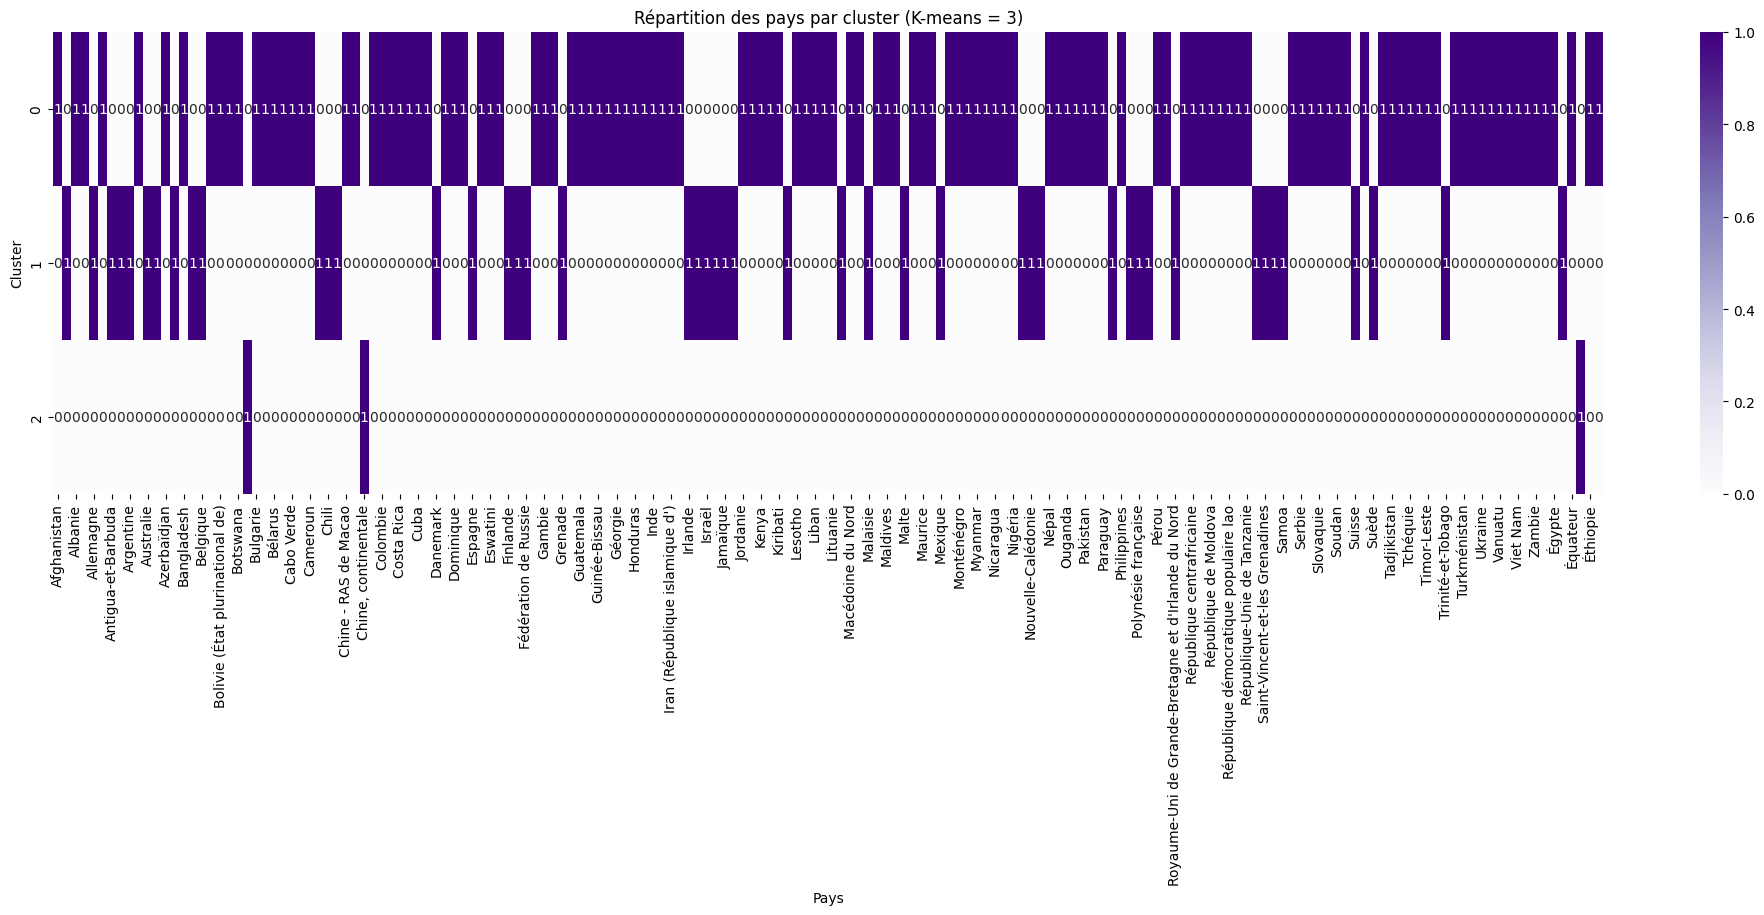

In [77]:
#Heatmap des pays par cluster
df_heatmap = pd.crosstab(df_full["Cluster_3"], df_full["Pays"])

plt.figure(figsize=(25, 6))
sns.heatmap(df_heatmap, cmap="Purples", annot=True, cbar=True)
plt.title("Répartition des pays par cluster (K-means = 3)")
plt.xlabel("Pays")
plt.ylabel("Cluster")
plt.show()


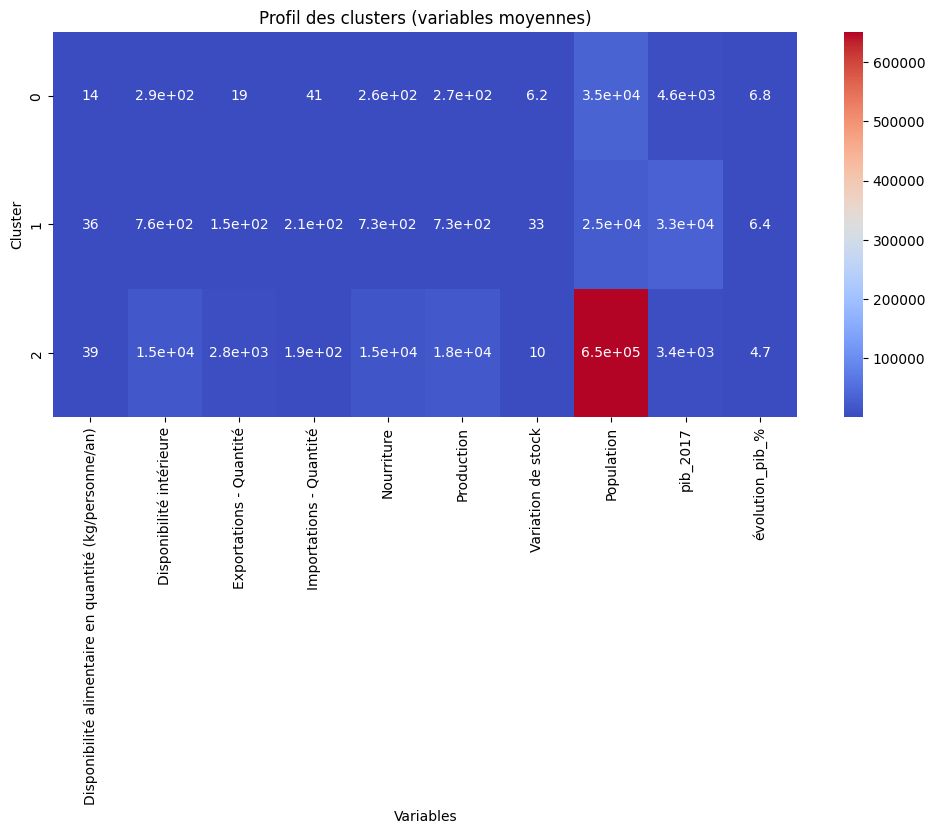

In [78]:
#Heatmap des moyennes des variables par cluster
df_cluster_mean = df_full.groupby("Cluster_3").mean(numeric_only=True)

plt.figure(figsize=(12, 5))
sns.heatmap(df_cluster_mean, cmap="coolwarm", annot=True)
plt.title("Profil des clusters (variables moyennes)")
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.show()


In [79]:
#Liste des pays par cluster
for c in sorted(df_full["Cluster_3"].unique()):
    print(f"\n--- Cluster {c} ---")
    pays = df_full[df_full["Cluster_3"] == c]["Pays"].tolist()
    print(", ".join(pays))



--- Cluster 0 ---
Afghanistan, Albanie, Algérie, Angola, Arménie, Azerbaïdjan, Bangladesh, Belize, Bolivie (État plurinational de), Bosnie-Herzégovine, Botswana, Bulgarie, Burkina Faso, Bélarus, Bénin, Cabo Verde, Cambodge, Cameroun, Chine - RAS de Macao, Chine, Taiwan Province de, Chypre, Colombie, Congo, Costa Rica, Croatie, Cuba, Côte d'Ivoire, Djibouti, Dominique, El Salvador, Estonie, Eswatini, Fidji, Gabon, Gambie, Ghana, Grèce, Guatemala, Guinée, Guinée-Bissau, Guyana, Géorgie, Haïti, Honduras, Hongrie, Inde, Indonésie, Iran (République islamique d'), Iraq, Jordanie, Kazakhstan, Kenya, Kirghizistan, Kiribati, Lesotho, Lettonie, Liban, Libéria, Lituanie, Macédoine du Nord, Madagascar, Malawi, Maldives, Mali, Maroc, Maurice, Mauritanie, Mongolie, Monténégro, Mozambique, Myanmar, Namibie, Nicaragua, Niger, Nigéria, Népal, Oman, Ouganda, Ouzbékistan, Pakistan, Panama, Paraguay, Philippines, Pérou, Roumanie, Rwanda, République centrafricaine, République de Corée, République de Moldo

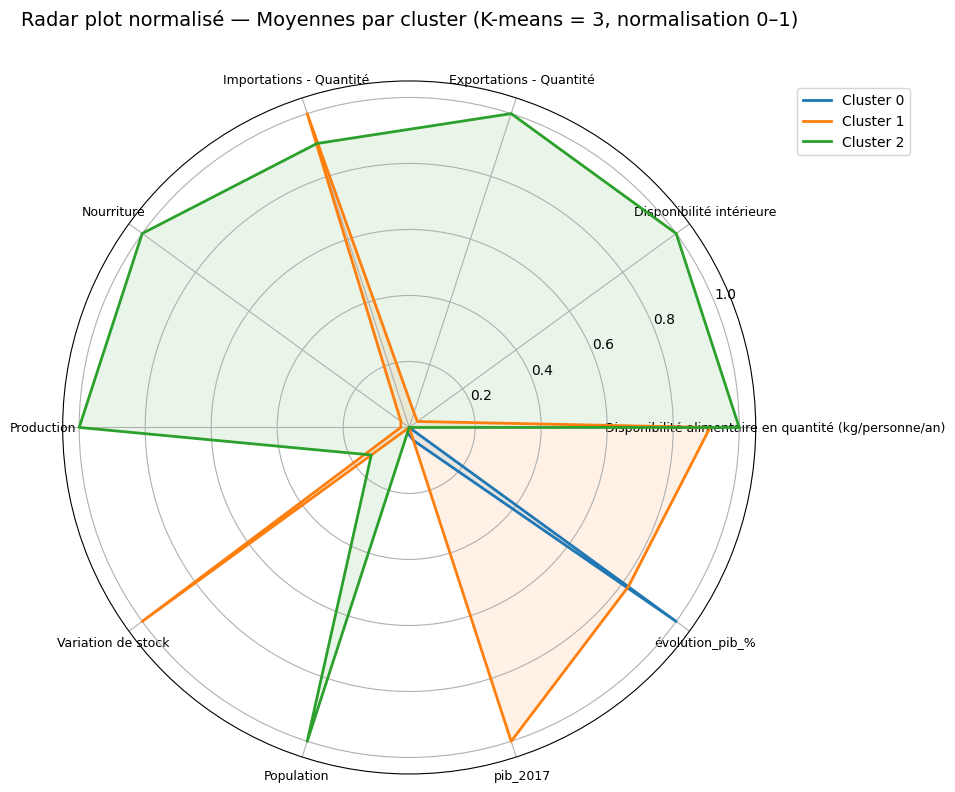

In [80]:
#Calcul des moyennes des variables par cluster
df_cluster_3_mean = df_full.groupby("Cluster_3").mean(numeric_only=True)

#Sélection des variables à afficher sur le radar
variables = [
    col for col in df_cluster_3_mean.columns
    if col not in ["Cluster_3", "Cluster", "Cluster_4", "Cluster_5", "Pays"]
]

df_cluster_3_mean = df_cluster_3_mean[variables]

#Normalisation min-max (0 → 1) variable par variable
df_norm = (df_cluster_3_mean - df_cluster_3_mean.min()) / (df_cluster_3_mean.max() - df_cluster_3_mean.min())

num_vars = len(variables)

#Angles du radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

#Radar plot
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

for cluster in df_norm.index:
    values = df_norm.loc[cluster].tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster}")
    ax.fill(angles, values, alpha=0.1)

#Détails
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=9)

plt.title("Radar plot normalisé — Moyennes par cluster (K-means = 3, normalisation 0–1)", fontsize=14, pad=40)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()


##5.2 - Test avec k-means = 4

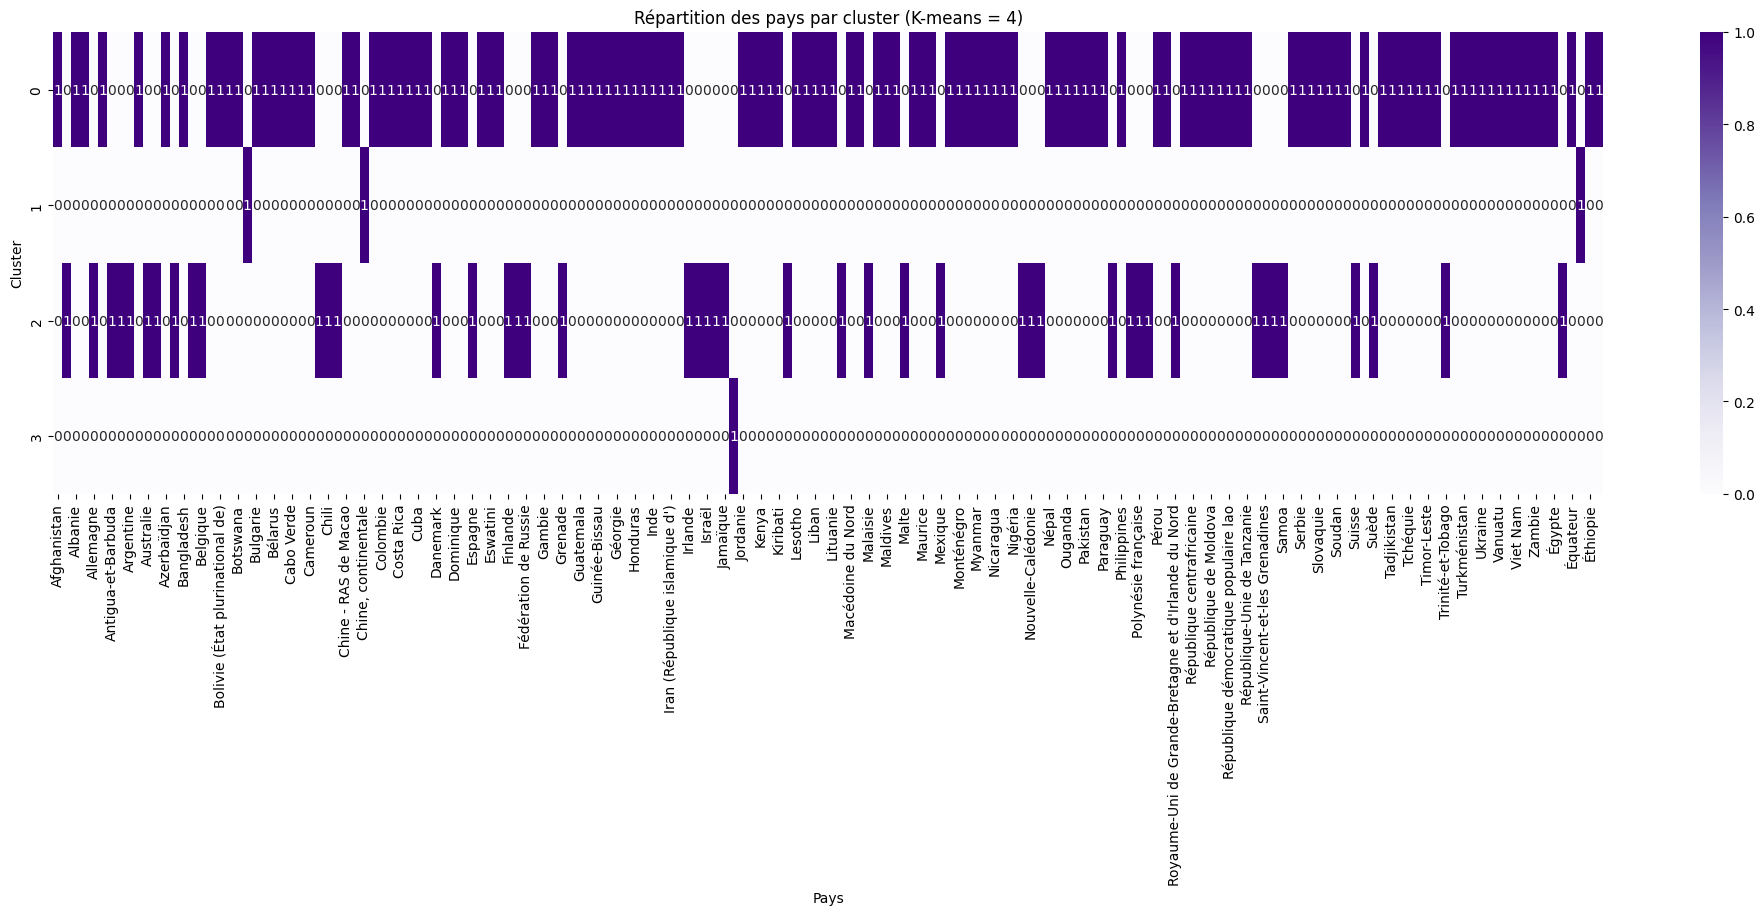

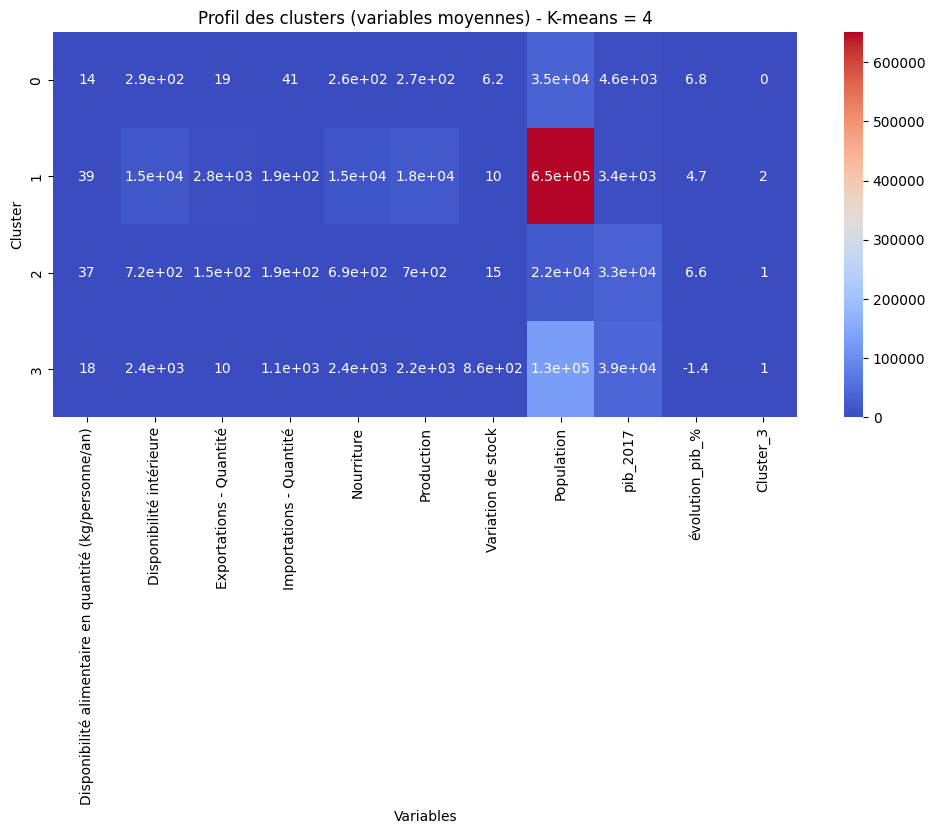

In [81]:
#Suppression de la colonne "Pays"
X = df_full.drop(columns=["Pays"])

#Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-means = 4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
df_full["Cluster_4"] = kmeans_4.fit_predict(X_scaled)

#Heatmap Pays et Clusters
df_heatmap = pd.crosstab(df_full["Cluster_4"], df_full["Pays"])

plt.figure(figsize=(25, 6))
sns.heatmap(df_heatmap, cmap="Purples", annot=True, cbar=True)
plt.title("Répartition des pays par cluster (K-means = 4)")
plt.xlabel("Pays")
plt.ylabel("Cluster")
plt.show()

#Heatmap avec moyenne des variables par cluster
df_cluster_4_mean = df_full.groupby("Cluster_4").mean(numeric_only=True)

plt.figure(figsize=(12, 5))
sns.heatmap(df_cluster_4_mean, cmap="coolwarm", annot=True)
plt.title("Profil des clusters (variables moyennes) - K-means = 4")
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.show()


In [82]:
#Liste des pays par cluster
for c in sorted(df_full["Cluster_4"].unique()):
    print(f"\n--- Cluster {c} ---")
    pays = df_full[df_full["Cluster_4"] == c]["Pays"].tolist()
    print(", ".join(pays))



--- Cluster 0 ---
Afghanistan, Albanie, Algérie, Angola, Arménie, Azerbaïdjan, Bangladesh, Belize, Bolivie (État plurinational de), Bosnie-Herzégovine, Botswana, Bulgarie, Burkina Faso, Bélarus, Bénin, Cabo Verde, Cambodge, Cameroun, Chine - RAS de Macao, Chine, Taiwan Province de, Chypre, Colombie, Congo, Costa Rica, Croatie, Cuba, Côte d'Ivoire, Djibouti, Dominique, El Salvador, Estonie, Eswatini, Fidji, Gabon, Gambie, Ghana, Grèce, Guatemala, Guinée, Guinée-Bissau, Guyana, Géorgie, Haïti, Honduras, Hongrie, Inde, Indonésie, Iran (République islamique d'), Iraq, Jordanie, Kazakhstan, Kenya, Kirghizistan, Kiribati, Lesotho, Lettonie, Liban, Libéria, Lituanie, Macédoine du Nord, Madagascar, Malawi, Maldives, Mali, Maroc, Maurice, Mauritanie, Mongolie, Monténégro, Mozambique, Myanmar, Namibie, Nicaragua, Niger, Nigéria, Népal, Oman, Ouganda, Ouzbékistan, Pakistan, Panama, Paraguay, Philippines, Pérou, Roumanie, Rwanda, République centrafricaine, République de Corée, République de Moldo

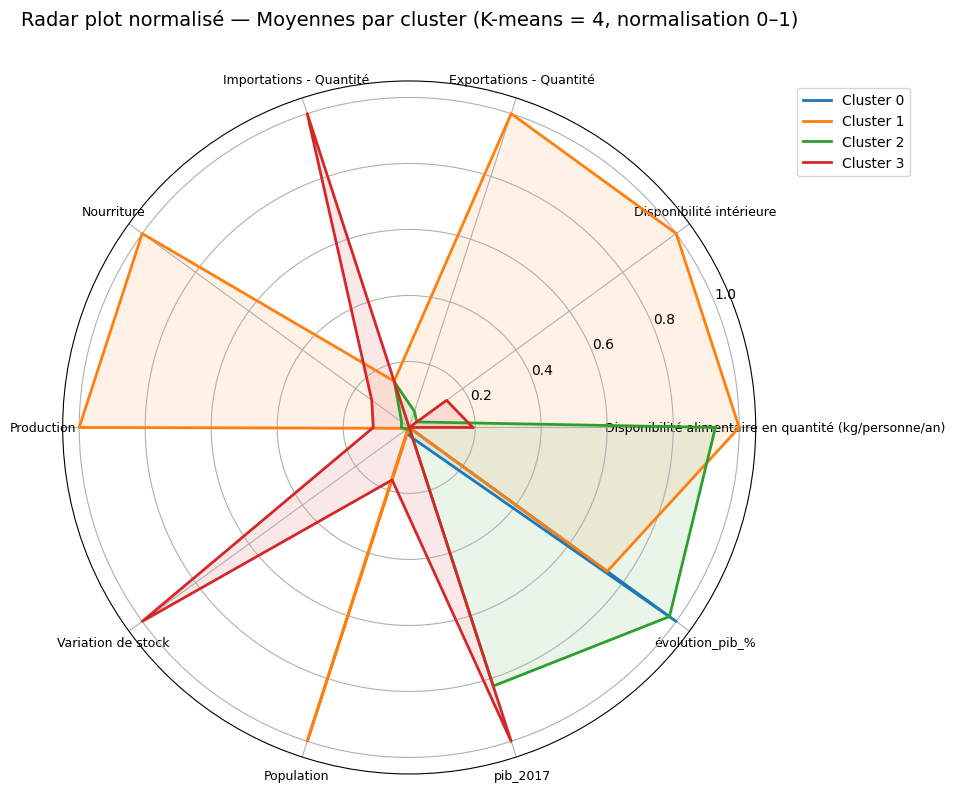

In [83]:
#Calcul des moyennes des variables par cluster
df_cluster_4_mean = df_full.groupby("Cluster_4").mean(numeric_only=True)

#Sélection des variables à afficher sur le radar
variables = [
    col for col in df_cluster_4_mean.columns
    if col not in ["Cluster_3", "Cluster", "Cluster_4", "Cluster_5", "Pays"]
]

df_cluster_4_mean = df_cluster_4_mean[variables]

#Normalisation min-max (0 → 1) variable par variable
df_norm = (df_cluster_4_mean - df_cluster_4_mean.min()) / (df_cluster_4_mean.max() - df_cluster_4_mean.min())

num_vars = len(variables)

#Angles du radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

#Radar plot
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

for cluster in df_norm.index:
    values = df_norm.loc[cluster].tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster}")
    ax.fill(angles, values, alpha=0.1)

#Détails
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=9)

plt.title("Radar plot normalisé — Moyennes par cluster (K-means = 4, normalisation 0–1)", fontsize=14, pad=40)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

##5.3 - Test avec k-means = 5

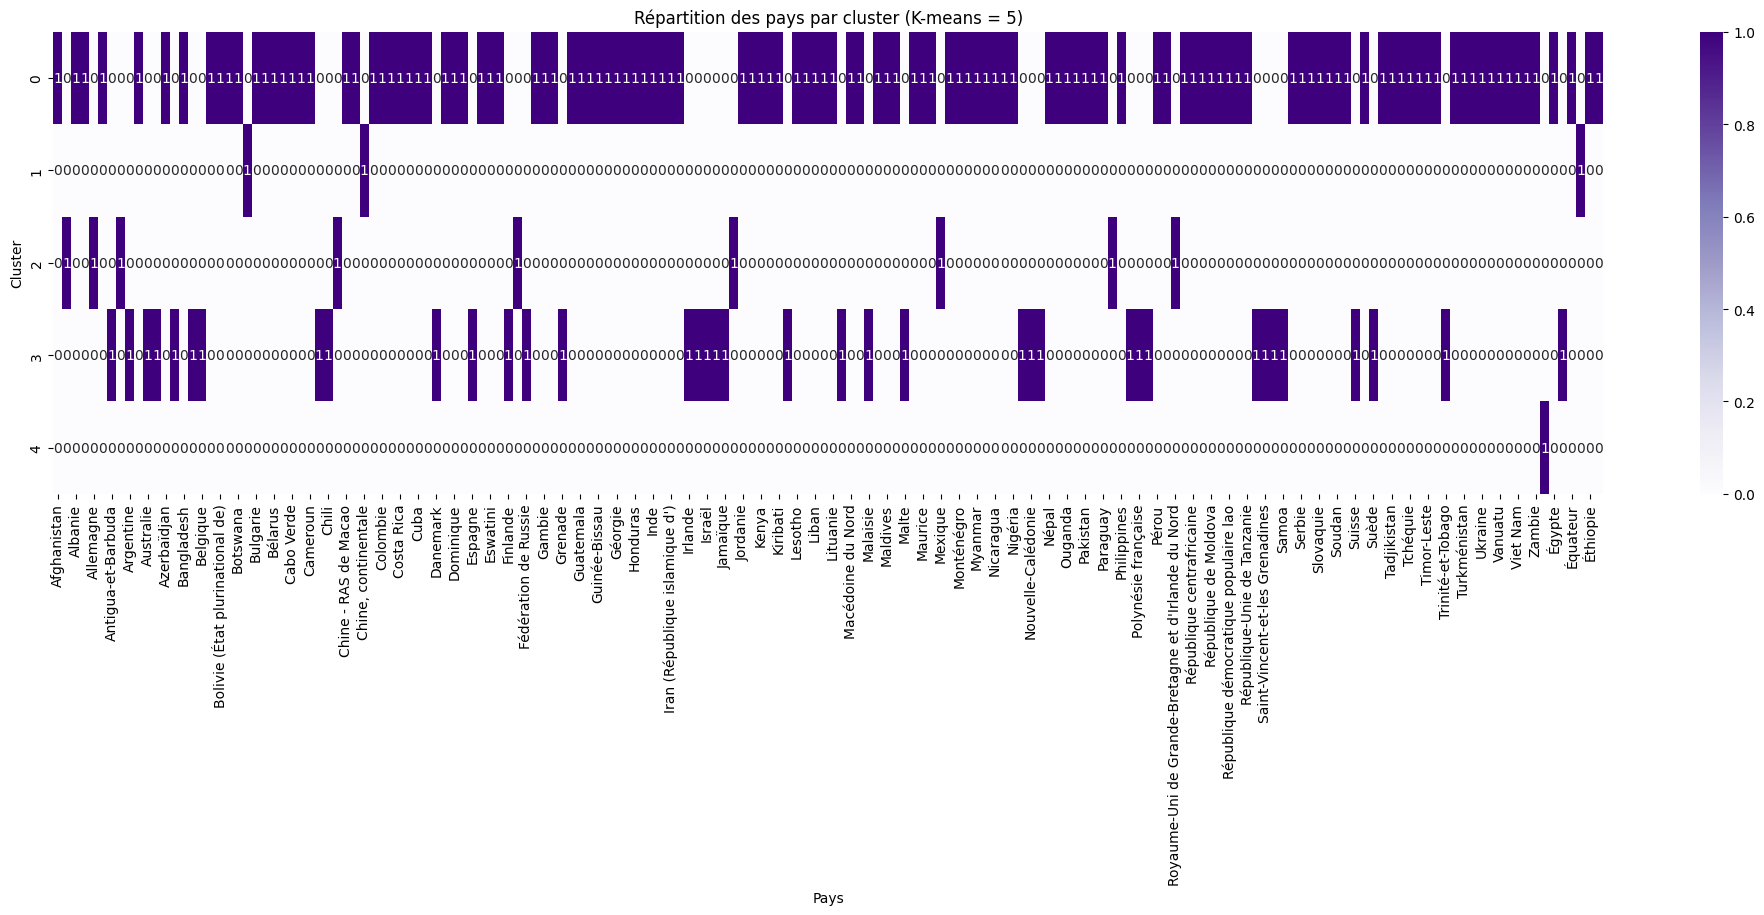

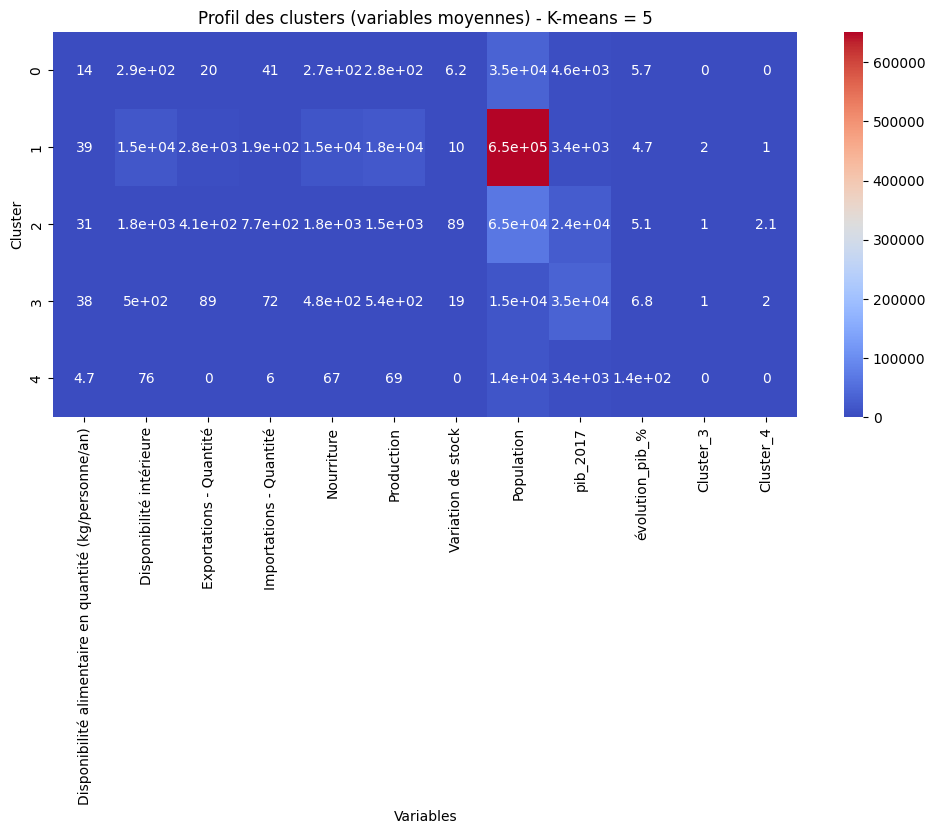

In [84]:
#Suppression de la colonne "Pays"
X = df_full.drop(columns=["Pays"])

#Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-means = 5
kmeans_5 = KMeans(n_clusters=5, random_state=42, n_init=10)
df_full["Cluster_5"] = kmeans_5.fit_predict(X_scaled)

#Heatmap Pays et Clusters
df_heatmap = pd.crosstab(df_full["Cluster_5"], df_full["Pays"])

plt.figure(figsize=(25, 6))
sns.heatmap(df_heatmap, cmap="Purples", annot=True, cbar=True)
plt.title("Répartition des pays par cluster (K-means = 5)")
plt.xlabel("Pays")
plt.ylabel("Cluster")
plt.show()

#Heatmap des moyennes des variables par cluster
df_cluster_5_mean = df_full.groupby("Cluster_5").mean(numeric_only=True)

plt.figure(figsize=(12, 5))
sns.heatmap(df_cluster_5_mean, cmap="coolwarm", annot=True)
plt.title("Profil des clusters (variables moyennes) - K-means = 5")
plt.xlabel("Variables")
plt.ylabel("Cluster")
plt.show()


In [85]:
#Liste des pays par cluster
for c in sorted(df_full["Cluster_5"].unique()):
    print(f"\n--- Cluster {c} ---")
    pays = df_full[df_full["Cluster_5"] == c]["Pays"].tolist()
    print(", ".join(pays))



--- Cluster 0 ---
Afghanistan, Albanie, Algérie, Angola, Arménie, Azerbaïdjan, Bangladesh, Belize, Bolivie (État plurinational de), Bosnie-Herzégovine, Botswana, Bulgarie, Burkina Faso, Bélarus, Bénin, Cabo Verde, Cambodge, Cameroun, Chine - RAS de Macao, Chine, Taiwan Province de, Chypre, Colombie, Congo, Costa Rica, Croatie, Cuba, Côte d'Ivoire, Djibouti, Dominique, El Salvador, Estonie, Eswatini, Fidji, Gabon, Gambie, Ghana, Grèce, Guatemala, Guinée, Guinée-Bissau, Guyana, Géorgie, Haïti, Honduras, Hongrie, Inde, Indonésie, Iran (République islamique d'), Iraq, Jordanie, Kazakhstan, Kenya, Kirghizistan, Kiribati, Lesotho, Lettonie, Liban, Libéria, Lituanie, Macédoine du Nord, Madagascar, Malawi, Maldives, Mali, Maroc, Maurice, Mauritanie, Mongolie, Monténégro, Mozambique, Myanmar, Namibie, Nicaragua, Niger, Nigéria, Népal, Oman, Ouganda, Ouzbékistan, Pakistan, Panama, Paraguay, Philippines, Pérou, Roumanie, Rwanda, République centrafricaine, République de Corée, République de Moldo

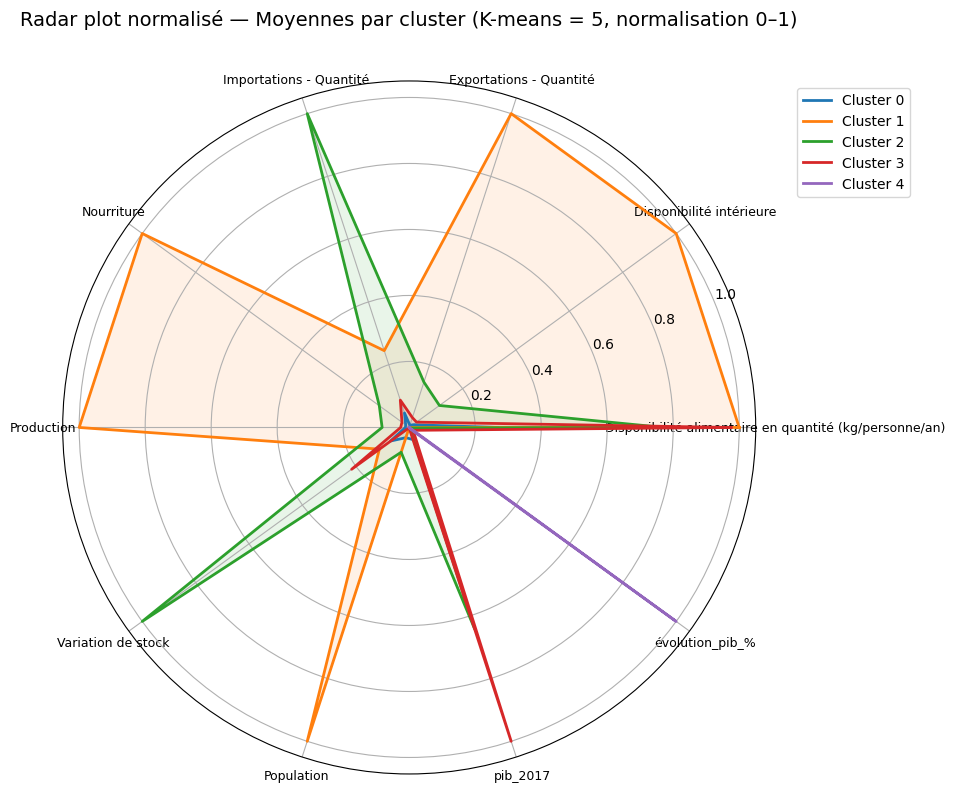

In [86]:
#Calcul des moyennes des variables par cluster
df_cluster_5_mean = df_full.groupby("Cluster_5").mean(numeric_only=True)

#Sélection des variables à afficher sur le radar
variables = [
    col for col in df_cluster_5_mean.columns
    if col not in ["Cluster_3", "Cluster", "Cluster_4", "Cluster_5", "Pays"]
]

df_cluster_5_mean = df_cluster_5_mean[variables]

#Normalisation min-max (0 → 1) variable par variable
df_norm = (df_cluster_5_mean - df_cluster_5_mean.min()) / (df_cluster_5_mean.max() - df_cluster_5_mean.min())

num_vars = len(variables)

#Angles du radar
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

#Radar plot
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

for cluster in df_norm.index:
    values = df_norm.loc[cluster].tolist()
    values += values[:1]

    ax.plot(angles, values, linewidth=2, label=f"Cluster {cluster}")
    ax.fill(angles, values, alpha=0.1)

#Détails
ax.set_xticks(angles[:-1])
ax.set_xticklabels(variables, fontsize=9)

plt.title("Radar plot normalisé — Moyennes par cluster (K-means = 5, normalisation 0–1)", fontsize=14, pad=40)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()